## Links for IB trading and connectivity.

##### To find Symbols and Product descriptions
 https://misc.interactivebrokers.com/cstools/contract_info/v3.10/index.php?site=IB&action=Top+Search&symbol=ES&description=ES
 
##### order submission example
https://pythonprogramming.net/ibpy-tutorial-using-interactive-brokers-api-python/

## Alternative IB package ib_insync
https://github.com/erdewit/ib_insync/blob/master/README.rst

The ib_insync package is build on top of the Python API from Interactive Brokers. The objective is to make it as easy as possible to use the API to its fullest extent.

The main features are:

An IB component that automatically keeps in sync;
An easy to use linear style of programming (no more callbacks);
A fully asynchonous framework based on asyncio for advanced users;
Interactive operation with live data in Jupyter notebooks.

documentation for ib_insync

https://rawgit.com/erdewit/ib_insync/master/docs/html/notebooks.html

In [93]:
import pandas as pd 
import numpy as np
import matplotlib
import xlwings as xw
import bt
import ffn
import seaborn as sn
# import cufflink as cf

sn.set(palette='dark')

In [75]:
# ib.disconnect() #always disconnet after session

In [77]:
from ib_insync import *
util.startLoop()  # uncomment this line when in a notebook

ib = IB()
ib.connect('127.0.0.1', 4001, clientId=2)

<IB connected to 127.0.0.1:4001 clientId=2>

## Calling Historical Bars from ib_insync

,open,high,low,close,volume,barCount,average
date,,,,,,,
2019-01-31 14:23:00,108.8465,108.8570,108.8415,108.8560,-1,-1,-1.0
2019-01-31 14:24:00,108.8560,108.8560,108.8535,108.8545,-1,-1,-1.0
2019-01-31 14:25:00,108.8545,108.8545,108.8370,108.8375,-1,-1,-1.0
2019-01-31 14:26:00,108.8375,108.8375,108.8085,108.8225,-1,-1,-1.0
2019-01-31 14:27:00,108.8225,108.8255,108.8220,108.8225,-1,-1,-1.0


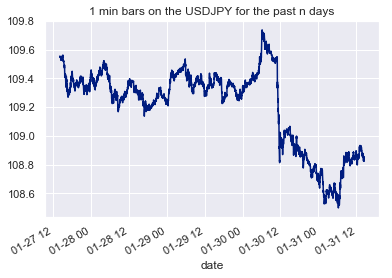

In [127]:

#Pull the first Product
contract1 = Forex('USDJPY')  #Future('ES', '201903', 'GLOBEX')
bars1 = ib.reqHistoricalData(contract1, endDateTime='', durationStr='5 D',
        barSizeSetting='1 min', whatToShow='MIDPOINT', useRTH=True)

# convert to pandas dataframe:
df = util.df(bars1)
# print(df1[['date', 'open', 'high', 'low', 'close']])
df.index = pd.to_datetime(df.date)
df.pop('date')
df.tail()
df['close'].plot(title= '1 min bars on the USDJPY for the past n days')

df1 = df
df1.tail()

,open,high,low,close,volume,barCount,average
date,,,,,,,
2019-01-31 14:23:00,1.144685,1.144695,1.144670,1.144695,-1,-1,-1.0
2019-01-31 14:24:00,1.144695,1.144695,1.144675,1.144675,-1,-1,-1.0
2019-01-31 14:25:00,1.144680,1.144700,1.144515,1.144520,-1,-1,-1.0
2019-01-31 14:26:00,1.144520,1.144665,1.144520,1.144540,-1,-1,-1.0
2019-01-31 14:27:00,1.144540,1.144570,1.144535,1.144560,-1,-1,-1.0


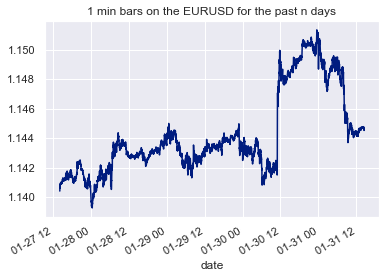

In [128]:

#Pull the second Product
contract2= Forex('EURUSD')  #Future('ES', '201903', 'GLOBEX')
bars2 = ib.reqHistoricalData(contract2, endDateTime='', durationStr='5 D',
        barSizeSetting='1 min', whatToShow='MIDPOINT', useRTH=True)

# convert to pandas dataframe:
df = util.df(bars2)
# print(df2[['date', 'open', 'high', 'low', 'close']])
df.index = pd.to_datetime(df.date)
df.pop('date')
df.tail()
df['close'].plot(title= '1 min bars on the EURUSD for the past n days')

df2 = df
df2.tail()

## interacting with Excel

In [99]:
import xlwings as xw

In [100]:
wb = xw.Book('IB_Bar_Data.xlsx') # this will create a new workbook
# connect to an existing file in the current working directory
#wb = xw.Book('FileName.xlsx')  
# on Windows: use raw strings to escape backslashes
#wb = xw.Book(r'C:\path\to\file.xlsx')  

In [101]:
df1  = df1['close'].to_frame()
df2  = df2['close'].to_frame()


In [108]:

#merge the two timeseries
df1.columns = ['USDJPY']
df2.columns = ['EURUSD']

df = bt.merge(df1, df2)
df.tail()

,USDJPY,EURUSD
date,,
2019-01-31 13:57:00,108.8530,1.144680
2019-01-31 13:58:00,108.8620,1.144755
2019-01-31 13:59:00,108.8800,1.144715
2019-01-31 14:15:00,108.8250,1.144775
2019-01-31 14:16:00,108.8315,1.144780


In [114]:
df_re = ffn.rebase(df)

In [115]:
sht = wb.sheets['Sheet1']

In [116]:
sht.range('A1').value = df

<Picture 'MyPlot' in <Sheet [IB_Bar_Data.xlsx]Sheet1>>

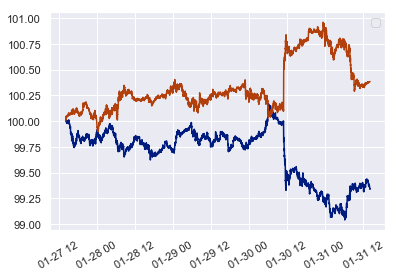

In [119]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(df_re,) #
plt.xticks(rotation=30)
plt.legend('')
sht.pictures.add(fig, name='MyPlot', update=True)

In [ ]:
# add a second market to simulate the SP/cash spread.

## Basics¶

A look at what's inside the ib_insync package:

In [ ]:
import ib_insync
print(ib_insync.__all__)

## Importing
The following two lines are used at the top of all notebooks. 
* The first line imports everything and 
* the second starts an event loop to keep the notebook live updated:

In [ ]:
from ib_insync import *
util.startLoop()

In [ ]:
ib = IB()
ib.connect('127.0.0.1', 4001, clientId=2)

In [ ]:
ib.positions()

In [ ]:
[v for v in ib.accountValues() if v.tag == 'NetLiquidationByCurrency' and v.currency == 'BASE']

## Contracts
Contracts can be specified in different ways:

* The ibapi way, by creating an empty Contract object and setting its attributes one by one;
* By using Contract and giving the attributes as keyword argument;
* By using the specialized Stock, Option, Future, Forex, Index, CFD, Commodity, Bond, FuturesOption, MutualFund or Warrant contracts.
Some examples:

In [120]:

Contract(conId=270639)
Stock('AMD', 'SMART', 'USD')
Stock('INTC', 'SMART', 'USD', primaryExchange='NASDAQ')
Forex('EURUSD')
CFD('IBUS30')
Future('ES', '201903', 'GLOBEX')
Option('SPY', '20170721', 240, 'C', 'SMART')
Bond(secIdType='ISIN', secId='US03076KAA60');

In [126]:
contract = Future('ES', '20190315', 'GLOBEX')
des = ib.reqContractDetails(contract)

[ContractDetails(contract=Stock(conId=76792991, symbol='TSLA', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='TSLA', tradingClass='NMS'), marketName='NMS', minTick=0.01, orderTypes='ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASKET,BENCHPX,COND,CONDORDER,DARKONLY,DARKPOLL,DAY,DEACT,DEACTDIS,DEACTEOD,DIS,GAT,GTC,GTD,GTT,HID,IBKRATS,ICE,IMB,IOC,LIT,LMT,LOC,MIT,MKT,MOC,MTL,NGCOMB,NODARK,NONALGO,OCA,OPG,OPGREROUT,PEGBENCH,POSTONLY,PREOPGRTH,REL,RPI,RTH,SCALE,SCALEODD,SCALERST,SNAPMID,SNAPMKT,SNAPREL,STP,STPLMT,SWEEP,TRAIL,TRAILLIT,TRAILLMT,TRAILMIT,WHATIF', validExchanges='SMART,AMEX,NYSE,CBOE,ISE,CHX,ARCA,ISLAND,DRCTEDGE,BEX,BATS,EDGEA,CSFBALGO,JEFFALGO,BYX,IEX,FOXRIVER,TPLUS1,NYSENAT,PSX', priceMagnifier=1, longName='TESLA INC', industry='Consumer, Cyclical', category='Auto Manufacturers', subcategory='Auto-Cars/Light Trucks', timeZoneId='EST5EDT', tradingHours='20190131:0400-20190131:2000;20190201:0400-20190201:2000;20190202:CLOSED;20190203:CLOSED;20190204:0400-

## Current state vs request

Doing a request involves network traffic going up and down and can take considerable time. The current state on the other hand is always immediately available. So it is preferable to use the current state methods over requests. For example, use `ib.openOrders()` in preference over `ib.reqOpenOrders()`, or `ib.positions()` over `ib.reqPositions()`, etc:

In [ ]:
%time l = ib.positions()

In [ ]:
%time l = ib.reqPositions()

In [ ]:
util.logToConsole()

In [ ]:

import logging
util.logToConsole(logging.DEBUG)

In [ ]:

ib.disconnect()

In [ ]:

from ib_insync import *
util.startLoop()

ib = IB()
ib.connect('127.0.0.1', 4001, clientId=11)

In [129]:
es = Future('ES', '20190315', 'GLOBEX')
cds = ib.reqContractDetails(es)
len(cds)

1

In [ ]:
cds[0]

## The contract itself is in the 'contract' property of the contract details. Lets make a list of contracts and look at the first:

In [130]:
contracts = [cd.contract for cd in cds]

contracts[0]

Future(conId=299552802, symbol='ES', lastTradeDateOrContractMonth='20190315', multiplier='50', exchange='GLOBEX', currency='USD', localSymbol='ESH9', tradingClass='ES')

In [131]:
util.df(contracts)

,secType,conId,symbol,lastTradeDateOrContractMonth,strike,right,multiplier,exchange,primaryExchange,currency,localSymbol,tradingClass,includeExpired,secIdType,secId,comboLegsDescrip,comboLegs,deltaNeutralContract
0,FUT,299552802,ES,20190315,0.0,,50,GLOBEX,,USD,ESH9,ES,False,,,,None,None


In [132]:
{key: set(getattr(c, key) for c in contracts) for key in Contract.defaults}

{'secType': {'FUT'},
 'conId': {299552802},
 'symbol': {'ES'},
 'lastTradeDateOrContractMonth': {'20190315'},
 'strike': {0.0},
 'right': {''},
 'multiplier': {'50'},
 'exchange': {'GLOBEX'},
 'primaryExchange': {''},
 'currency': {'USD'},
 'localSymbol': {'ESH9'},
 'tradingClass': {'ES'},
 'includeExpired': {False},
 'secIdType': {''},
 'secId': {''},
 'comboLegsDescrip': {''},
 'comboLegs': {None},
 'deltaNeutralContract': {None}}

In [ ]:

ib.disconnect()

# Streaming tick data

https://github.com/erdewit/ib_insync/blob/master/notebooks/tick_data.ipynb

Create some Forex contracts:

In [142]:
contracts = [Forex(pair) for pair 
             in 'EURUSD USDJPY GBPUSD USDCHF USDCAD AUDUSD'.split()]

eurusd = contracts[0]

In [145]:
for contract in contracts :
    ib.reqMktData(contract, '', False, False)

In [146]:
contracts

[Forex('EURUSD', exchange='IDEALPRO'),
 Forex('USDJPY', exchange='IDEALPRO'),
 Forex('GBPUSD', exchange='IDEALPRO'),
 Forex('USDCHF', exchange='IDEALPRO'),
 Forex('USDCAD', exchange='IDEALPRO'),
 Forex('AUDUSD', exchange='IDEALPRO')]

In [151]:
ticker = ib.ticker(eurusd)
ib.sleep(2)

ticker

Ticker(contract=Forex('EURUSD', exchange='IDEALPRO'), time=datetime.datetime(2019, 1, 31, 22, 34, 40, 364597, tzinfo=datetime.timezone.utc), bid=1.14452, bidSize=3000000, ask=1.1446, askSize=1000000, prevBid=1.14453, prevBidSize=6000000, prevAsk=1.14457, prevAskSize=500000, high=1.1448, low=1.14445, close=1.1449, ticks=[], tickByTicks=[], domBids=[], domAsks=[], domTicks=[])

In [152]:
ticker.marketPrice()

1.14456

##### The following cell will start a 30 second loop that prints a live updated ticker table. It is updated on every ticker change.

In [157]:
# from IPython.display import display, clear_output
# import pandas as pd

# df = pd.DataFrame(columns='symbol bidSize bid ask askSize high low close'.split())
# df['symbol'] = [c.symbol + c.currency for c in contracts]
# contract2Row = {c: i for (i, c) in enumerate(contracts)}

# # def onPendingTickers(tickers):
# #     for t in tickers:
# #         row = contract2Row[t.contract]
# #         df.iloc[row, 1:] = (t.bidSize, t.bid, t.ask, t.askSize, t.high, t.low, t.close)
# #         clear_output(wait=True)
# #     display(df)        

# # ib.pendingTickersEvent += onPendingTickers
# # ib.sleep(30)
# # ib.pendingTickersEvent -= onPendingTickers

##### To stop the live tick subscriptions:

In [156]:
for contract in contracts:
    ib.cancelMktData(contract)